In [ ]:
## Test API

In [ ]:
import os
from utils import get_openai_api_key
from openai import OpenAI

openai_api_key = get_openai_api_key()

client = OpenAI(
  api_key=openai_api_key
)

completion = client.chat.completions.create(
  model="gpt-4o-mini",
  store=True,
  messages=[
    {"role": "user", 
     "content": "write a haiku about ai"
    }
  ]
)

print(completion.choices[0].message);


ChatCompletionMessage(content='Lines of code entwined,  \nThoughts of metal, light, and dreams—  \nA spark of our minds.', refusal=None, role='assistant', audio=None, function_call=None, tool_calls=None, annotations=[])


In [ ]:
# Local model
from langchain_ollama import ChatOllama


local_llm = "qwen2.5:7b"
Model = ChatOllama(model=local_llm, temperature=0.0)

In [ ]:
from dotenv import load_dotenv, find_dotenv

_ = load_dotenv(find_dotenv()) 
OPENAI_API_KEY = os.getenv("OPENAI_API_KEY")
SERPER_API_KEY = os.environ["SERPER_API_KEY"]

LANGSMITH_TRACING = os.environ["LANGSMITH_TRACING"]
LANGSMITH_ENDPOINT = os.environ["LANGSMITH_ENDPOINT"]
LANGSMITH_API_KEY = os.environ["LANGSMITH_API_KEY"]
LANGSMITH_PROJECT = os.environ["LANGSMITH_PROJECT"]


In [ ]:
from langchain_openai import ChatOpenAI
from langchain_community.utilities import GoogleSerperAPIWrapper
from langgraph_supervisor import create_supervisor
from langgraph.prebuilt import create_react_agent

model = ChatOpenAI(model="gpt-4o-mini")

# Create specialized agents

def add(a: float, b: float) -> float:
    """Add two numbers."""
    return a + b

def multiply(a: float, b: float) -> float:
    """Multiply two numbers."""
    return a * b

def web_search(query: str) -> str:
    """Searches the web for information given a query using Google Serper API Wrapper.

    Args:
    ---------------
        query: A string

    Returns:
    ---------------
        Text output in string format.
    """
    search = GoogleSerperAPIWrapper() # uses os.environ["SERPER_API_KEY"]
    try:
        results = search.run(query)
        return results
    except Exception as e:
        return f"Error during web search: {e}"

In [30]:
math_agent = create_react_agent(
    model=Model,
    tools=[add, multiply],
    name="math_expert",
    prompt="You are a math expert. Always use one tool at a time."
)

research_agent = create_react_agent(
    model=Model,
    tools=[web_search],
    name="research_expert",
    prompt="You are a world class researcher with access to web search. Do not do any math."
)



In [46]:
workflow = create_supervisor(
    [research_agent, math_agent],
    model=Model,
    prompt=(
        "You are a team supervisor managing a research expert and a math expert. "
        "For current events, use research_agent. "
        "For math problems, use math_agent."
    )
)

# Compile and run
app = workflow.compile()
result = app.invoke({
    "messages": [
        {
            "role": "user",
            "content": "what's the combined headcount of the FAANG companies in 2024?"
        }
    ]
})

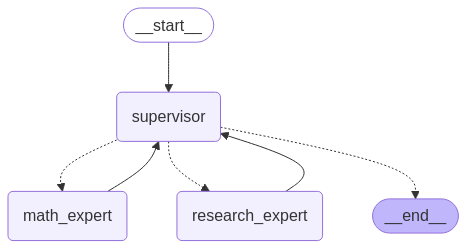

In [14]:
from IPython.display import Image, display
display(Image(app.get_graph().draw_mermaid_png()))

In [40]:
for m in result["messages"]:
    m.pretty_print()

================================ Human Message =================================

what's the combined headcount of the FAANG companies in 2024?
================================== Ai Message ==================================
Name: supervisor
Tool Calls:
  transfer_to_research_expert (b6adde55-a96e-44c9-9ce2-f2c9b7d3d616)
 Call ID: b6adde55-a96e-44c9-9ce2-f2c9b7d3d616
  Args:
================================= Tool Message =================================
Name: transfer_to_research_expert

Successfully transferred to research_expert
================================== Ai Message ==================================
Name: research_expert

The information provided does not directly give the combined headcount of the FAANG companies for 2024, but we can infer some details:

1. **Meta (formerly Facebook)** - Has been ramping up hiring in 2024 and is noted to be hiring significantly more engineers than other companies.
2. **Apple** - No specific headcount information provided.
3. **Amazon** - N